# Emotion Detection


# Importing Libraries


In [2]:
import matplotlib.pyplot as plt
from glob import glob
import random
import os
import cv2
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input,Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print(tf.__version__)


2.13.0-rc1


**Exploring Dataset**

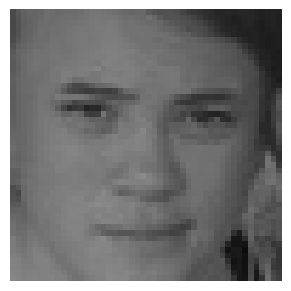

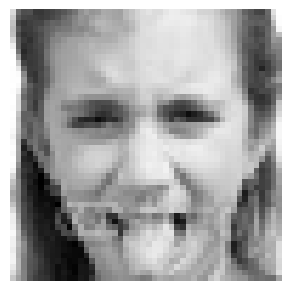

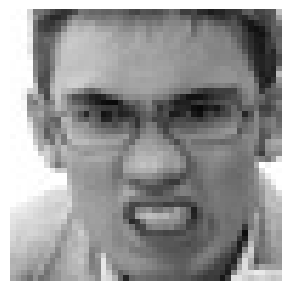

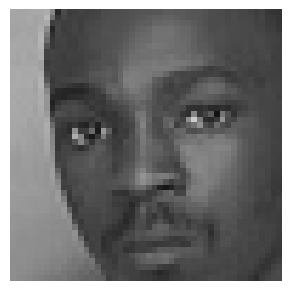

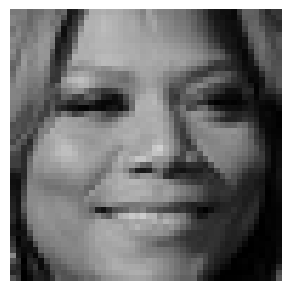

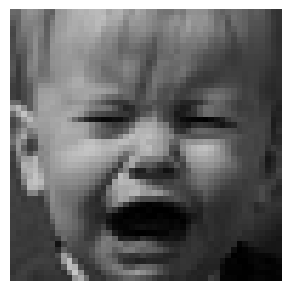

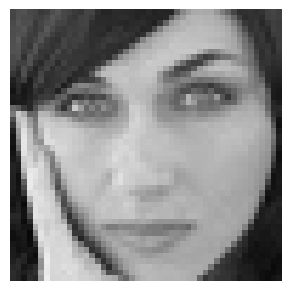

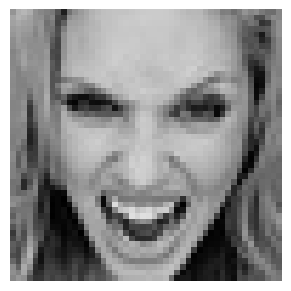

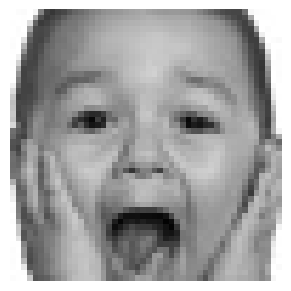

In [4]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**preparing data for training**


In [16]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size=(img_size, img_size),
                                                   batch_size=batch_size,
                                                   color_mode="grayscale",
                                                   class_mode="categorical",
                                                   shuffle=True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    color_mode="grayscale",
                                                    class_mode="categorical",
                                                    shuffle=True)           








Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [32]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x


In [29]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [34]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    
    return model


    

In [35]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_7 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 128)       0     

**Initializing the model**

In [43]:
epochs = 15
steps_per_epoch = train_generator.n/train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weight.h5", monitor ="val_accuracy", save_weightd_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

# Training the Model

the next cell takes time to complete

In [44]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
449/448 [==============================] - ETA: 0s - loss: 1.6517 - accuracy: 0.3751
Epoch 1: saving model to model_weight.h5


/Users/shreyasu/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


448/448 [==============================] - 68s 150ms/step - loss: 1.6517 - accuracy: 0.3751 - val_loss: 1.5874 - val_accuracy: 0.3913
Epoch 2/15
449/448 [==============================] - ETA: 0s - loss: 1.3464 - accuracy: 0.4916
Epoch 2: saving model to model_weight.h5
448/448 [==============================] - 69s 153ms/step - loss: 1.3464 - accuracy: 0.4916 - val_loss: 1.5056 - val_accuracy: 0.4019
Epoch 3/15
449/448 [==============================] - ETA: 0s - loss: 1.1884 - accuracy: 0.5554
Epoch 3: saving model to model_weight.h5
448/448 [==============================] - 70s 157ms/step - loss: 1.1884 - accuracy: 0.5554 - val_loss: 1.4565 - val_accuracy: 0.4478
Epoch 4/15
449/448 [==============================] - ETA: 0s - loss: 1.0531 - accuracy: 0.6140
Epoch 4: saving model to model_weight.h5
448/448 [==============================] - 73s 162ms/step - loss: 1.0531 - accuracy: 0.6140 - val_loss: 1.6669 - val_accuracy: 0.3701
Epoch 5/15
449/448 [==============================] -

**Model Evaluation**

In [47]:
model.evaluate(validation_generator)

113/113 [==============================] - 3s 30ms/step - loss: 2.1519 - accuracy: 0.4753


[2.1518869400024414, 0.4753413200378418]

**Plotting Loss**

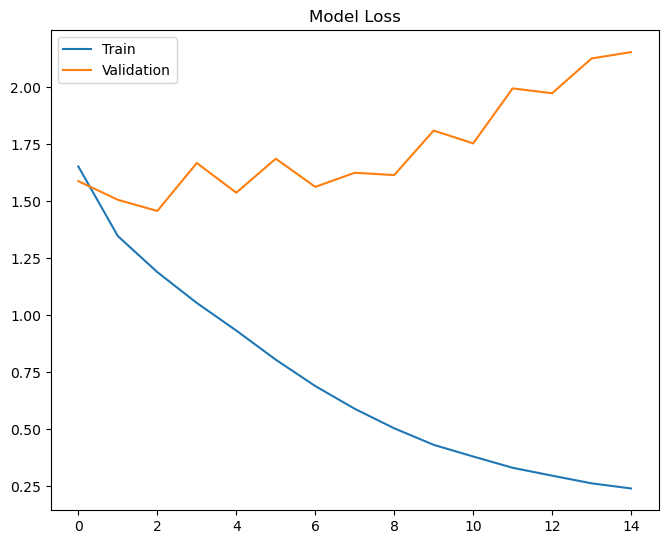

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right = 0.95,left=0.0,hspace=0.25,wspace=0.35)

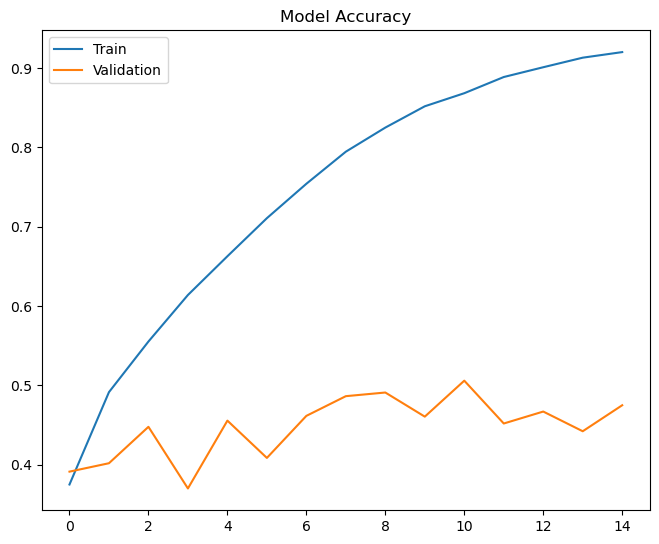

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right = 0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model**

In [53]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)